In [1]:
import numpy as np
import pandas as pd

In [2]:
%time
df = pd.read_csv('Loan_Default.csv')

CPU times: total: 0 ns
Wall time: 0 ns


# Data Loading

In [14]:
%time
df = pd.read_csv('iris.data.csv', header=None)

CPU times: total: 0 ns
Wall time: 0 ns


In [15]:
df.describe()

0           1          2           3
count  151.000000  155.000000  155.00000  155.000000
mean     5.835762    3.060645    3.75871    1.198710
std      0.848869    0.434173    1.76719    0.761747
min      4.300000    2.000000    1.00000    0.100000
25%      5.100000    2.800000    1.60000    0.300000
50%      5.700000    3.000000    4.40000    1.300000
75%      6.400000    3.300000    5.10000    1.800000
max      7.900000    4.400000    6.90000    2.500000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       151 non-null    float64
 1   1       155 non-null    float64
 2   2       155 non-null    float64
 3   3       155 non-null    float64
 4   4       155 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


In [17]:
df.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2          ISE

In [18]:
df.tail()

0    1    2    3               4
150  6.7  3.0  5.2  2.3  Iris-virginica
151  6.3  2.5  5.0  1.9  Iris-virginica
152  6.5  3.0  5.2  2.0  Iris-virginica
153  6.2  3.4  5.4  2.3  Iris-virginica
154  5.9  3.0  5.1  1.8  Iris-virginica

# Missing data

In [19]:
df.isnull().sum()

0    4
1    0
2    0
3    0
4    0
dtype: int64

In [20]:
mean = df[0].mean()
df[0].fillna(value=mean, axis=0, inplace=True)

In [21]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

# Duplicate data

In [25]:
df[5] = pd.DataFrame(np.random.randint(150,200,size=(len(df.index),)))

In [22]:
df.duplicated().sum()

7

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

# Normalization

In [27]:
df[5].head()

0    151.0
1    189.0
2    180.0
3    153.0
4    182.0
Name: 5, dtype: float64

In [28]:
def normal(x):
    max = df[5].max()
    min = df[5].min()
    return (x - min) / (max - min)

In [29]:
df[5] = df[5].apply(normal)

In [31]:
df[5].head()

0    0.020408
1    0.795918
2    0.612245
3    0.061224
4    0.653061
Name: 5, dtype: float64

# Formatting

In [32]:
y = df.iloc[:,4].values
np.unique(y)

array(['ISE', 'IVE', 'IVI', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [33]:
X = df.iloc[:,[2,3]].values
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6,

In [34]:
X.shape, y.shape

((148, 2), (148,))

In [35]:
df[4].replace('ISE', 'Iris-setosa', inplace=True)

In [36]:
df[4].replace('IVE', 'Iris-versicolor', inplace=True)

In [37]:
df[4].replace('IVI', 'Iris-virginica', inplace=True)

In [38]:
y = df.iloc[:,4].values
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Label encoding

In [45]:
np.unique(df[4])

array([0, 1, 2], dtype=int64)

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[4] = le.fit_transform(df[4])
df

0    1    2    3  4         5
0    5.1  3.5  1.4  0.2  0  0.020408
1    4.9  3.0  1.4  0.2  0  0.795918
2    4.7  3.2  1.3  0.2  0  0.612245
3    4.6  3.1  1.5  0.2  0  0.061224
4    5.0  3.6  1.4  0.2  0  0.653061
..   ...  ...  ...  ... ..       ...
150  6.7  3.0  5.2  2.3  2       NaN
151  6.3  2.5  5.0  1.9  2       NaN
152  6.5  3.0  5.2  2.0  2       NaN
153  6.2  3.4  5.4  2.3  2       NaN
154  5.9  3.0  5.1  1.8  2       NaN

[148 rows x 6 columns]

In [47]:
np.unique(df[4])

array([0, 1, 2], dtype=int64)

# Visualisation

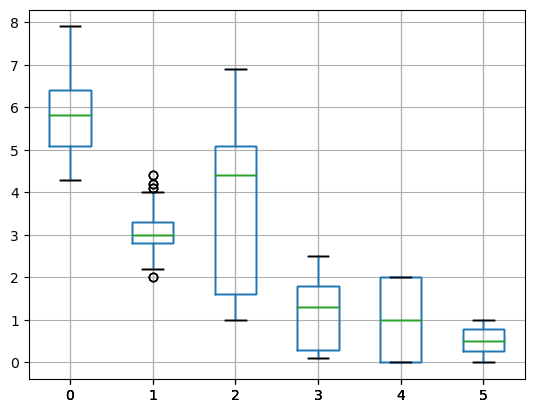

In [50]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()